<a href="https://colab.research.google.com/github/Kozzlov/k-means_clustering_dlabs_task/blob/main/clients_clustering_dlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          A         B         C  ...       D05       D06       D07
0  1.308617 -1.630007 -0.352207  ... -0.385150  1.250036 -1.423363
1  1.308617 -1.073986 -1.598223  ... -0.868590 -0.388965 -0.463107
2 -0.764166 -0.332624  0.893809  ...  0.374644 -0.016001  1.488268
3 -0.764166  0.655858 -0.352207  ...  0.268446 -0.499804 -0.248676
4  1.308617  1.211879 -0.352207  ... -0.290214 -0.385091  0.998914
5  1.308617  1.273659 -1.598223  ...  1.616359  0.855976  0.018228
6 -0.764166 -0.394404  0.893809  ... -0.406723 -0.195171 -0.773798
7  1.308617 -1.012206 -1.598223  ... -0.987977  0.413374 -1.666177
8 -0.764166 -1.444667 -1.598223  ...  0.836339 -0.660303 -1.066123
9 -0.764166  0.841198 -0.352207  ...  0.201367 -0.656948  1.266168

[10 rows x 12 columns]
(1500, 12)
A      0
B      0
C      0
D      0
E      0
D01    0
D02    0
D03    0
D04    0
D05    0
D06    0
D07    0
dtype: int64


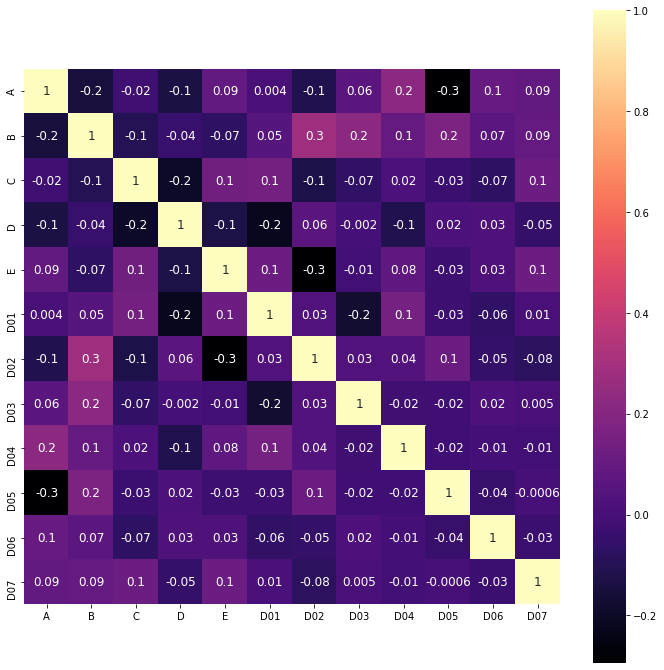

In [ ]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing

#importing the dataset
dataset_personality = pd.read_csv('sample_data/data science task personality.csv')
dataset_users = pd.read_csv('sample_data/data science task users.csv')

#preprocessing
dataset_users = dataset_users.drop(['UserBrowser'], axis=1)
dataset_personality.dropna()

# Male/Female
# 1 - m
# 0 - k
labelencoder = preprocessing.LabelEncoder()
dataset_users['D01'] = labelencoder.fit_transform(dataset_users['D01'])

#merging datasets by id, getting rid of duplicates values
all_person_info_df = pd.merge(dataset_users,
                              dataset_personality, 
                              on = 'UserIdentifier')

all_person_info_df = all_person_info_df.drop(['UserIdentifier'], axis=1).drop_duplicates()

def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

all_person_info_df = clean_dataset(all_person_info_df)  

scaler = preprocessing.StandardScaler()
scaled_all_person_info_df = scaler.fit_transform(all_person_info_df)
scaled_all_person_info_df = pd.DataFrame(scaled_all_person_info_df, columns=['A', 'B', 'C',
                                                                             'D', 'E',
                                                                             'D01', 'D02', 
                                                                             'D03', 'D04',
                                                                             'D05', 'D06',
                                                                             'D07'])
# checking if cleaning works fine                                                                              
print(scaled_all_person_info_df[:10])
print(scaled_all_person_info_df.shape)
print(scaled_all_person_info_df.isna().sum())

plt.figure(figsize=(12, 12)) 
core_general = scaled_all_person_info_df.corr()
sns.heatmap(core_general, 
            annot = True,
            cmap='magma', 
            cbar_kws= {'orientation': 'vertical'},
            fmt='.1g',
            annot_kws={'size': 12},
            square=True)

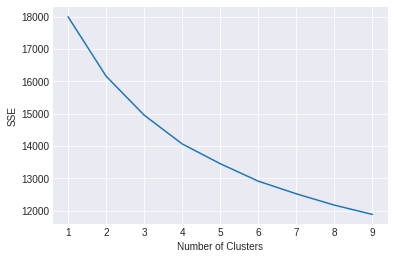

4 - is an optimal number of clusters identified by KneeLocator method


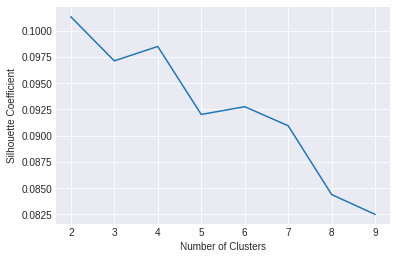

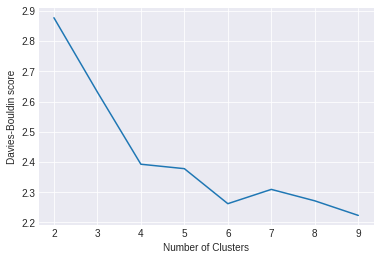

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

# scaled_all_person_info_df = scaled_all_person_info_df[['A', 'B', 'C', 'D', 'E']]
# print(scaled_all_person_info_df.head)

# elbow method
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_all_person_info_df)
    Sum_of_squared_distances.append(km.inertia_)

plt.style.use("seaborn-darkgrid")
plt.plot(range(1, 10), Sum_of_squared_distances)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# due to the fact that proper number of clusters is not clear at all 
# I tried to use kneed in order to identify proper number of clusters 
# https://realpython.com/k-means-clustering-python/

!pip install kneed
from kneed import KneeLocator

kl = KneeLocator(
   range(1, 10), Sum_of_squared_distances, curve="convex", direction="decreasing"
)
print(kl.elbow, '- is an optimal number of clusters identified by KneeLocator method')

# it is not enouth for me and I will also try
# to use different method for determining the 
# optimal number of clusters - silhouette coefficient and davies-bouldin

# silhouette coefficient
silhouette_coefficients = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(scaled_all_person_info_df)
    score = silhouette_score(scaled_all_person_info_df, cluster.labels_)
    silhouette_coefficients.append(score)

plt.style.use("seaborn-darkgrid")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# davies-bouldin
db_coefficients = []
for k in range(2, 10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(scaled_all_person_info_df)
    score = davies_bouldin_score(scaled_all_person_info_df, cluster.labels_)
    db_coefficients.append(score)

plt.style.use("seaborn-darkgrid")
plt.plot(range(2, 10), db_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

# pd.plotting.scatter_matrix(scaled_all_person_info_df.iloc[:, 0:12], alpha = 0.3, figsize = (15,15), diagonal = 'kde');

(1500, 13) - dataframe shape after adding clusters label column 
          A         B         C  ...       D06       D07  cluster
0  1.308617 -1.630007 -0.352207  ...  1.250036 -1.423363        4
1  1.308617 -1.073986 -1.598223  ... -0.388965 -0.463107        2
2 -0.764166 -0.332624  0.893809  ... -0.016001  1.488268        1
3 -0.764166  0.655858 -0.352207  ... -0.499804 -0.248676        1
4  1.308617  1.211879 -0.352207  ... -0.385091  0.998914        2

[5 rows x 13 columns]
[211, 494, 417, 213, 165] - total number of users in each cluster


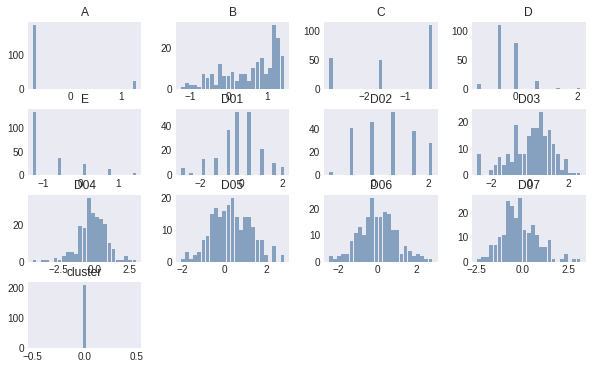

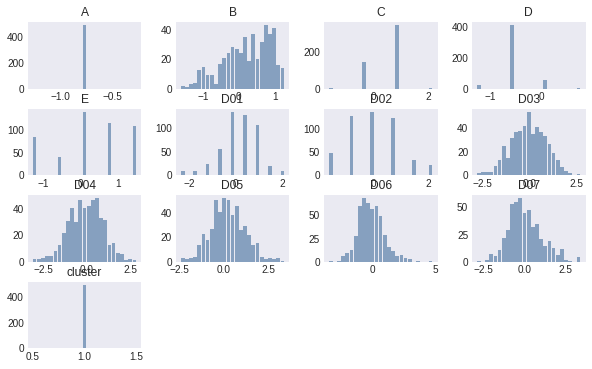

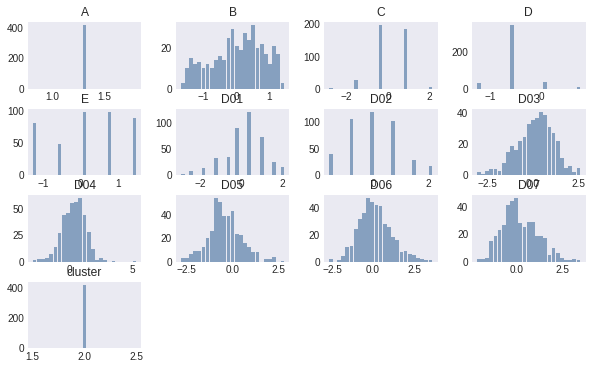

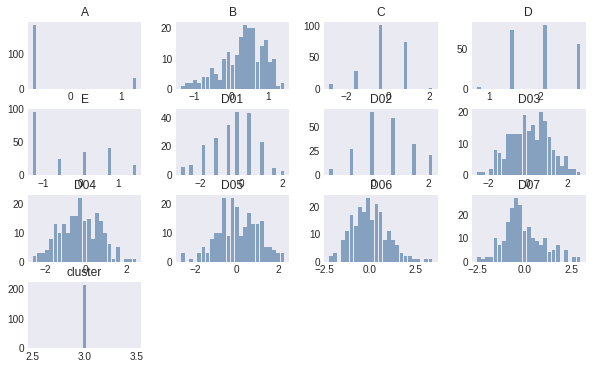

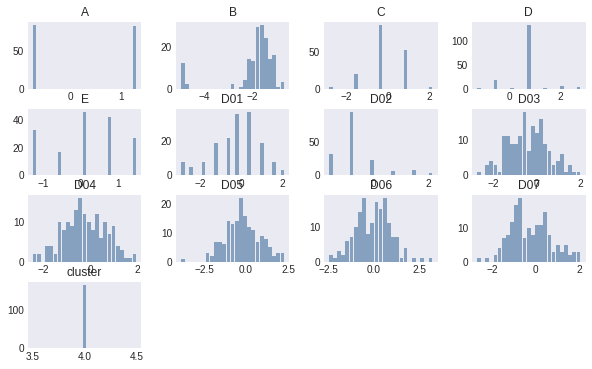

In [ ]:
n_clusters = 5

# training model on psychological features
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=50)
kmeans.fit(scaled_all_person_info_df[['A', 'B', 'C', 'D', 'E']]) 
results = kmeans.labels_

# merging main dataset with results trained on psychological features
results_dataframe = pd.DataFrame(results)  
all_person_info_results_df = pd.merge(scaled_all_person_info_df,
                                      results_dataframe, 
                                      left_index=True,
                                      right_index=True)
all_person_info_results_df.rename(columns={0:'cluster'}, inplace=True)
point_sum = [0] * n_clusters

# users distribution among 5 clusters
for index, row in all_person_info_results_df.iterrows():
  if(row['cluster'] == 0):
    point_sum[0] += 1
  if(row['cluster'] == 1):
    point_sum[1] += 1
  if(row['cluster'] == 2):
    point_sum[2] += 1 
  if(row['cluster'] == 3):
    point_sum[3] += 1
  if(row['cluster'] == 4):
    point_sum[4] += 1

print(point_sum, '- total number of users in each cluster')

# histograms with values distribution for each cluster 
for i in range (n_clusters):
  all_person_info_results_df[all_person_info_results_df.cluster == i].hist(bins=25,
                                                                           grid=False, 
                                                                           figsize=(10,6), 
                                                                           color='#86a0bf', 
                                                                           zorder=2,
                                                                           rwidth=0.9)